In [71]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### read output logs helper functions

In [72]:
# for chr1 only
def read_hiccups_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

In [73]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate data frame with loop and pairs info

In [144]:
def generate_loop_df():
    loop_data = []
    samples = glob.glob('results/loops/hiccups/chr1/*Homo*/')
    for fn in samples:
        
        sample_info = []
        sample_name = fn.split('/')[4]
        sample_info.append(sample_name)
        sample_info.append(sample_name.split(".")[3])
            
        file_path_mpairstat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}.mpairstat".format(sn = sample_name)
        file_path_mergestat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}_allValidPairs.mergestat".format(sn = sample_name)
        
        if os.path.exists(file_path_mpairstat):
            pairs_info = read_hicpro_stats_log(file_path_mpairstat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path_mergestat):
            pairs_info = read_hicpro_stats_log(file_path_mergestat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        
        
        file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
        file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
        file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")
            
        if os.path.exists(file_path5):
            loop_info = read_hiccups_loop_files(file_path5)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path10):
            loop_info = read_hiccups_loop_files(file_path10)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path25):
            loop_info = read_hiccups_loop_files(file_path25)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
            
        loop_data.append(sample_info)
    loop_df = pd.DataFrame(loop_data)
    return loop_df

In [145]:
loop_df = generate_loop_df()

In [146]:
loop_df.columns = ["Sample Name", "Protein", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (VC)", "Number of 10kb Loops (VC)", "Number of 25kb Loops (VC)"]
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,H3K27ac,290786588,166936714,377,401,387
1,Nonclassical_Monocyte_1815.phs001703v4p1.Homo_Sapiens.H3K27ac.b2,H3K27ac,37175512,9216537,0,0,0
2,MCF7-Abemaciclib.GSE157381.Homo_Sapiens.H3K27ac.b1,H3K27ac,93310066,54149792,130,142,118
3,Naive_B_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,H3K27ac,103939002,33519551,4,8,28
4,HARA.GSE147854.Homo_Sapiens.H3K27ac.b1,H3K27ac,48550865,18380230,13,26,62
5,Nonclassical_Monocyte_1814.phs001703v4p1.Homo_Sapiens.H3K27ac.b4,H3K27ac,14577920,7388626,0,0,0
6,CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,H3K27ac,48271682,25180345,105,124,71
7,A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b5,H3K27ac,92883566,33039572,0,3,36
8,SEC-WT-D7.GSE120294.Homo_Sapiens.SMC1A.b1,SMC1A,209646790,88952062,28,121,264
9,Monocyte_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,H3K27ac,13430575,6488622,2,7,18


#### sort table by Sample Name

In [77]:
loop_df = loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,YY1,45904302,14233750,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,YY1,92276625,23170231,0,0,0
2,293T.GSE128106.Homo_Sapiens.YY1.b1,YY1,247695887,24584547,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,CTCF,165894611,75756233,2,8,128
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,CTCF,78716891,31654215,0,2,52
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,CTCF,169061715,71886126,0,2,86
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,CTCF,103397011,38727933,1,2,22
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,CTCF,140903561,53019332,0,2,30
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,CTCF,113738451,41040755,0,2,8
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,CTCF,278154964,100153514,76,198,405


In [78]:
def parse_log(log):
    logs_data = []
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('Data not available for'):
                info = line.strip()
                logs_data.append(info)
                count = count + 1
    return logs_data

In [108]:
log_data = []
logs = ['results/loops/logs/run_hiccups.{t}5522535-28', 
        'results/loops/logs/run_hiccups.{t}5522535-20',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-62',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-63',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-73',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-74',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-164',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-165',
        '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/logs/run_hiccups.{t}5058311-166']
for log in logs:
    sample_data = []
    curr_log = log
    data = parse_log(curr_log.format(t = 'e'))
    nc_5 = []
    nc_10 = []
    nc_25 = []
    for line in data:
        if "at 5000" in line:
            nc_5.append(line.split()[4])
        if "at 10000" in line:
            nc_10.append(line.split()[4])
        if "at 25000" in line:
            nc_25.append(line.split()[4]) 
    with open(log.format(t = 'o')) as l:
        for line in l:
            if 'sample_name' in line:
                sample_data.append(line.strip().split()[1])
    sample_data.append(nc_5)
    sample_data.append(nc_10)
    sample_data.append(nc_25)
    log_data.append(sample_data)
nv_df = pd.DataFrame(log_data)

In [109]:
columns = ['sample_name', 'chrs_not_converged_5kb', 'chrs_not_converged_10kb', 'chrs_not_converged_25kb']
nv_df.columns = columns
nv_df

,sample_name,chrs_not_converged_5kb,chrs_not_converged_10kb,chrs_not_converged_25kb
0,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b2,"[1, Y]","[15, Y]","[15, Y]"
1,DCM_10.GSE165303.Homo_Sapiens.H3K27ac.b1,"[9, 11, Y]","[8, 9]","[1, 8, 9, 18]"
2,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,[18],"[9, 18]",[7]
3,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,[9],[18],[]
4,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1,"[9, 22, Y]","[10, 22, Y]","[10, Y]"
5,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2,"[5, 14, 22, Y]",[Y],"[11, Y]"
6,K562.GSE101498.Homo_Sapiens.H3K27ac.b1,"[9, 18, 21, Y]","[9, 11]","[6, 18]"
7,K562.GSE101498.Homo_Sapiens.H3K27ac.b2,"[9, 10, 15, 18]","[9, 18]",[]
8,K562.GSE101498.Homo_Sapiens.H3K27ac.b3,"[12, Y]",[],"[11, 17]"


#### sort table by Valid Interaction Pairs (greatest to least)

In [79]:
loop_df = loop_df.sort_values(by=["Valid Interaction Pairs"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
1,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A.b1,SMC1A,945712643,450158066,372,709,6299
2,MyLa.GSE151193.Homo_Sapiens.H3K27ac.b1,H3K27ac,736804619,445931504,867,1432,2787
3,Cardiac_Embryo_DKO.GSE121671.Mus_Musculus.SMC1A.b1,SMC1A,851533840,407209158,0,0,0
4,HCC1599-WT.GSE116872.Homo_Sapiens.SMC1A.b1,SMC1A,769438941,405941395,159,541,2049
5,Rec1-GSI.GSE116875.Homo_Sapiens.SMC1A.b1,SMC1A,803476313,390265154,84,562,3262
6,cbCD34+-HSPC-SJTALL005006-D2.GSE165207.Homo_Sapiens.H3K27ac.b1,H3K27ac,637169804,387908947,319,362,387
7,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27ac.b1,H3K27ac,630181138,380199595,909,1083,1213
8,Rec1-WT.GSE116875.Homo_Sapiens.SMC1A.b1,SMC1A,762451158,378396079,211,628,1524
9,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A.b2,SMC1A,813876932,372541441,257,526,2491
10,HCC1599-GSI.GSE116872.Homo_Sapiens.SMC1A.b1,SMC1A,725652659,371521572,108,359,1204


## Plot HiCCUPS Loops versus Valid Pairs

#### distrubutions of each loop type

count     486.000000
mean      136.104938
std       271.454493
min         0.000000
25%         3.000000
50%        26.000000
75%       151.750000
max      2472.000000
Name: Number of 5kb Loops (VC), dtype: float64

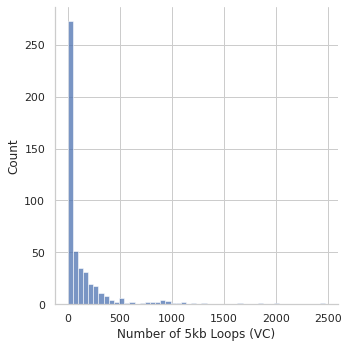

In [19]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 5kb Loops (VC)")
loop_df["Number of 5kb Loops (VC)"].describe()

count     486.000000
mean      194.209877
std       306.842075
min         0.000000
25%        13.500000
50%        74.500000
75%       247.750000
max      2754.000000
Name: Number of 10kb Loops (VC), dtype: float64

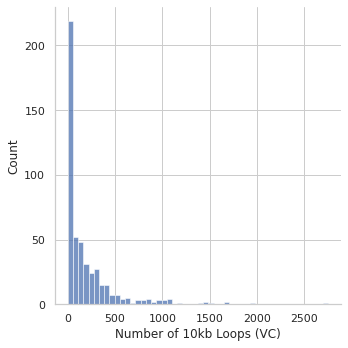

In [20]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 10kb Loops (VC)")
loop_df["Number of 10kb Loops (VC)"].describe()

count     486.000000
mean      296.010288
std       544.521432
min         0.000000
25%        47.000000
50%       141.000000
75%       354.750000
max      6299.000000
Name: Number of 25kb Loops (VC), dtype: float64

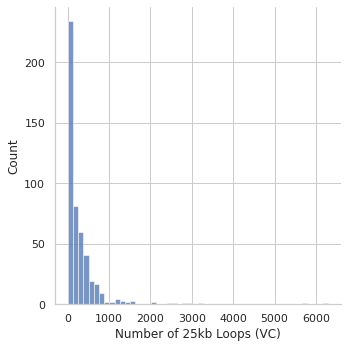

In [22]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=50, x="Number of 25kb Loops (VC)")
loop_df["Number of 25kb Loops (VC)"].describe()

In [25]:
np.percentile(loop_df["Number of 5kb Loops (VC)"], [10, 25, 50, 75, 99])

array([   0.  ,    3.  ,   26.  ,  151.75, 1211.7 ])

In [49]:
np.percentile(loop_df["Number of 10kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([   2.  ,   13.5 ,   74.5 ,  200.  ,  247.75, 1490.4 ])

In [53]:
np.percentile(loop_df["Number of 25kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([  10.  ,   47.  ,  141.  ,  295.  ,  354.75, 2643.35])

In [28]:
loop_df.describe()

,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
count,4.860000e+02,4.860000e+02,486.000000,486.000000,486.000000
mean,1.835866e+08,7.925346e+07,136.104938,194.209877,296.010288
std,1.621353e+08,8.124884e+07,271.454493,306.842075,544.521432
min,2.035761e+06,1.658719e+06,0.000000,0.000000,0.000000
25%,6.972896e+07,2.376500e+07,3.000000,13.500000,47.000000
50%,1.478690e+08,5.483546e+07,26.000000,74.500000,141.000000
75%,2.420703e+08,1.072029e+08,151.750000,247.750000,354.750000
max,9.457126e+08,4.501581e+08,2472.000000,2754.000000,6299.000000


#### plot valid interaction pairs vs. number 25kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (VC)'>

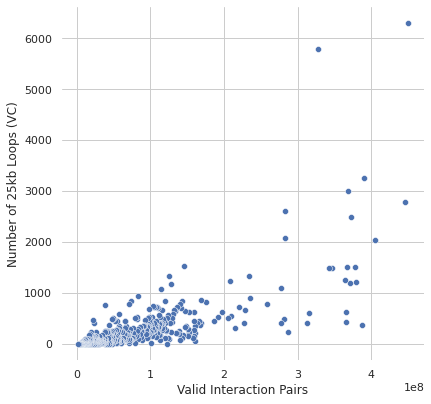

In [30]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (VC)",
                data=loop_df,
                ax=ax)

#### plot valid interaction pairs vs. number 10kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

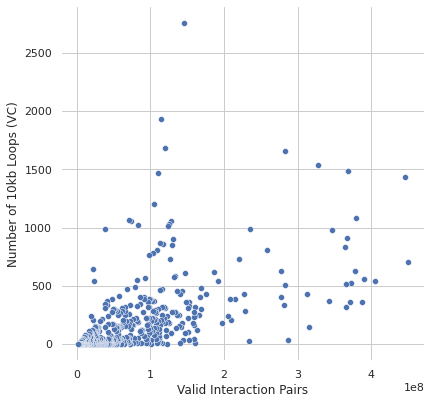

In [31]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

#### plot valid interaction pairs vs. number 5kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

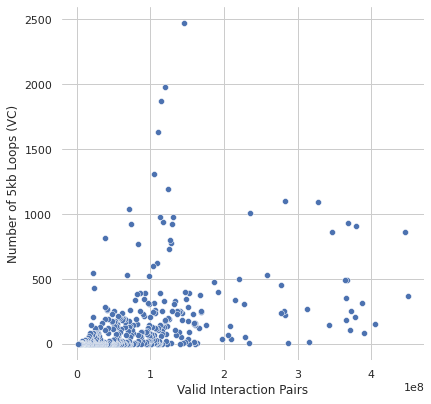

In [32]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

## Plotting Loops versus Valid Pairs using a Soft Threshold

In [33]:
soft_threshold = 2e8
soft_data = loop_df.loc[loop_df['Valid Interaction Pairs'] < soft_threshold]

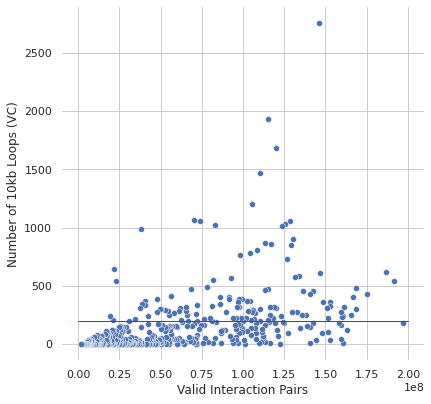

In [50]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                palette="pastel"
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

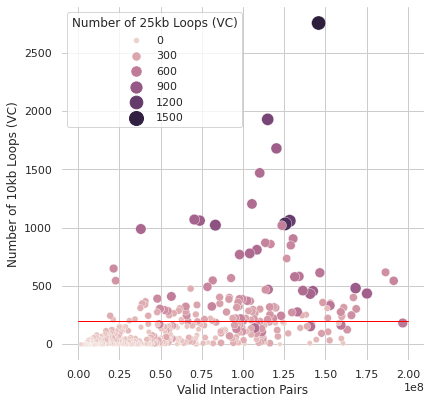

In [51]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 25kb Loops (VC)",
                size="Number of 25kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

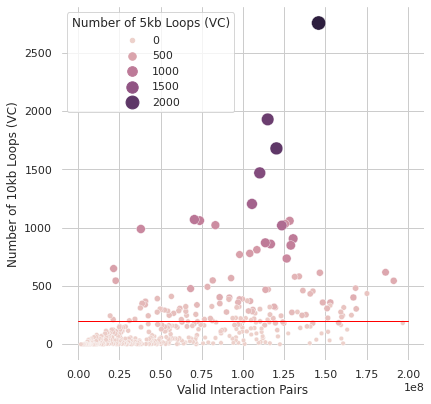

In [52]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 5kb Loops (VC)",
                size="Number of 5kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

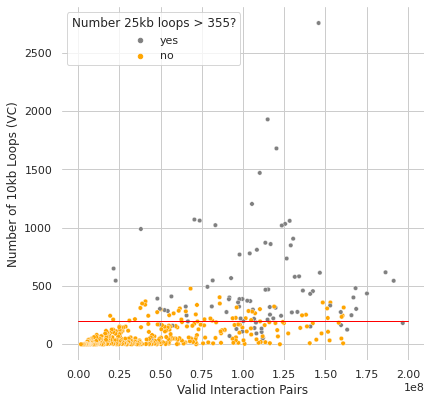

In [64]:
for index, row in soft_data.iterrows():
    if int(row['Number of 25kb Loops (VC)']) > 355:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "yes"
    else:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "no"

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number 25kb loops > 355?",
                size="Number 25kb loops > 355?",
                sizes=(20, 20),
                palette=["gray", "orange"]
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

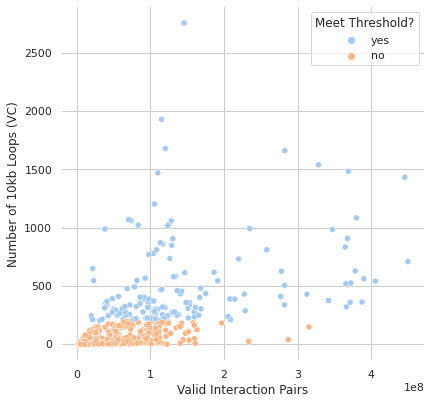

In [147]:
meet_thres = loop_df
for index, row in meet_thres.iterrows():
    if int(row['Number of 10kb Loops (VC)']) > 200:
        meet_thres.at[index, 'Meet Threshold?'] = "yes"
    else:
        meet_thres.at[index, 'Meet Threshold?'] = "no"
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                hue="Meet Threshold?",
                palette="pastel"
                )

In [86]:
for protein in loop_df.Protein.unique():
    print(protein, loop_df['Protein'].value_counts()[protein])


SMC1A 60
H3K27ac 368
RNA-Pol-II 2
H3K4me3 18
PR 2
Rad21 3
KLF4 12
CTCF 72
Gata1 4
H3K9me3 4
Oct4 4
Pax3 9
RYBP 2
H3K4me1 3
OCT4 2
YY1 10
NANOG 2
H3K4me4 1
Lbd1 3
SMC1 1
H3K27me3 2
V5 3


In [99]:
h3k27ac = loop_df.loc[loop_df["Protein"] == "H3K27ac"]
ctcf = loop_df.loc[loop_df["Protein"] == "CTCF"]
smc1a = loop_df.loc[loop_df["Protein"] == "SMC1A"]
h3k4me3 = loop_df.loc[loop_df["Protein"] == "H3K4me3"]

count    3.680000e+02
mean     7.611375e+07
std      7.512010e+07
min      1.658719e+06
25%      2.158053e+07
50%      5.503763e+07
75%      1.063039e+08
max      4.459315e+08
Name: Valid Interaction Pairs, dtype: float64

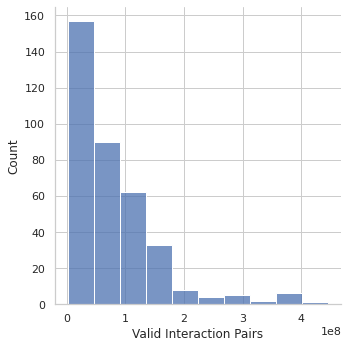

In [117]:
sns.displot(h3k27ac, bins=10, x="Valid Interaction Pairs")
h3k27ac["Valid Interaction Pairs"].describe()

count    7.200000e+01
mean     5.767595e+07
std      3.365159e+07
min      4.948961e+06
25%      3.118645e+07
50%      4.856483e+07
75%      8.219136e+07
max      1.347022e+08
Name: Valid Interaction Pairs, dtype: float64

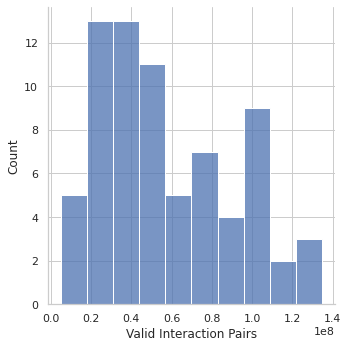

In [118]:
sns.displot(ctcf, bins=10, x="Valid Interaction Pairs")
ctcf["Valid Interaction Pairs"].describe()

count    6.000000e+01
mean     1.642920e+08
std      1.256786e+08
min      1.404864e+07
25%      6.206797e+07
50%      1.407878e+08
75%      2.303244e+08
max      4.501581e+08
Name: Valid Interaction Pairs, dtype: float64

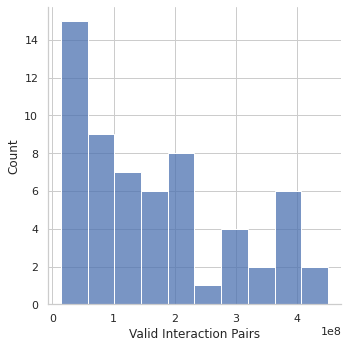

In [119]:
sns.displot(smc1a, bins=10, x="Valid Interaction Pairs")
smc1a["Valid Interaction Pairs"].describe()

count    1.800000e+01
mean     1.041491e+08
std      4.187928e+07
min      2.036773e+07
25%      7.129233e+07
50%      1.151212e+08
75%      1.268716e+08
max      1.877804e+08
Name: Valid Interaction Pairs, dtype: float64

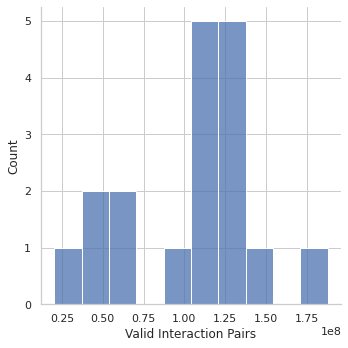

In [120]:
sns.displot(h3k4me3, bins=10, x="Valid Interaction Pairs")
h3k4me3["Valid Interaction Pairs"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

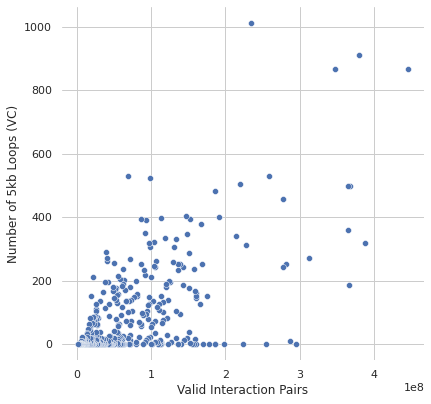

In [122]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k27ac,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

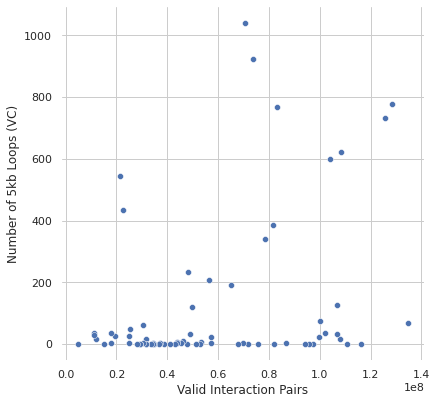

In [123]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=ctcf,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

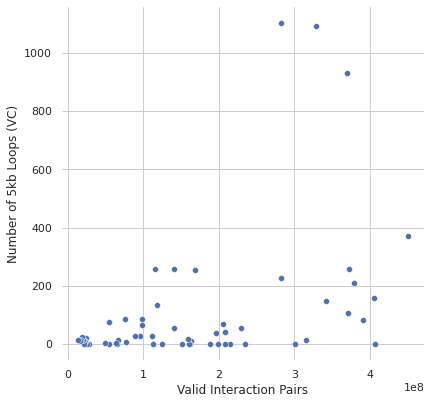

In [125]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=smc1a,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

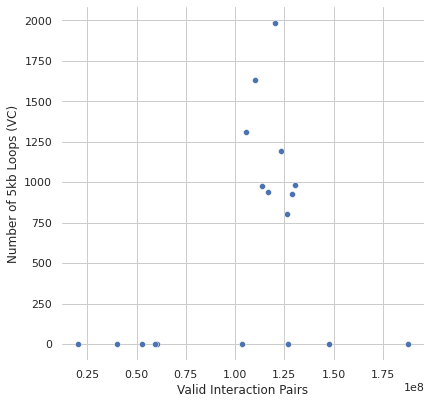

In [126]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                palette="pastel")

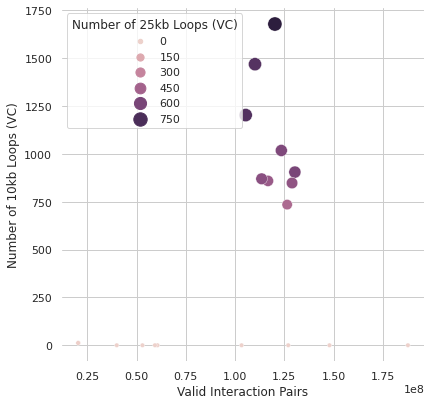

In [135]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                hue="Number of 25kb Loops (VC)",
                size="Number of 25kb Loops (VC)",
                sizes=(20, 200)
                )

### Decided Threshold: >=50 10kb loops OR >=11 5kb loops

## Get Samples that Meet Threshold

In [148]:
meet_thres = meet_thres.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
meet_thres = meet_thres.loc[meet_thres['Meet Threshold?'] == "yes"].reset_index(drop=True)
meet_thres

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC),Meet Threshold?
0,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,CTCF,171412471,65258210,191,323,448,yes
1,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,H3K27ac,337307006,191374595,402,544,526,yes
2,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,H3K27ac,269649847,138186301,251,253,209,yes
3,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,H3K27ac,275256905,135793235,235,248,221,yes
4,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,H3K27ac,291474091,152952908,395,358,230,yes
5,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,H3K27ac,400231692,258102758,530,810,788,yes
6,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,H3K27ac,148213169,62567313,191,212,124,yes
7,CUTLL1.GSE115896.Homo_Sapiens.H3K27ac.b1,H3K27ac,131679181,57916172,205,265,260,yes
8,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b1,H3K27ac,277293410,131359807,306,578,665,yes
9,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b2,H3K27ac,283390232,133973654,330,582,659,yes


In [149]:
print(len(meet_thres), 'samples meet threshold out of 486 samples', round(len(meet_thres)/486*100, 2), '%')

146 samples meet threshold out of 486 samples 30.04 %


In [150]:
#samplesheet = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/current-post-hicpro-without-header.tsv'
new_samples = '/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/hicpro/2022.10.20.09.39.hicpro.samplesheet.without_header.tsv'
samples_to_run = []

index = 1
with open(new_samples) as ss:
    for line in ss:
        info = line.strip().split()
        sample = info[0]
        if(sample in meet_thres.values):
            samples_to_run.append(str(index))
        index += 1
print(','.join(samples_to_run))
print("length:", len(samples_to_run))

5,38,43,45,46,47,48,49,50,51,52,58,62,63,64,66,67,73,74,75,76,77,78,81,92,93,98,99,104,107,108,109,110,111,113,115,116,121,126,127,135,138,140,142,144,146,149,162,164,165,166,168,169,170,171,185,186,190,194,203,204,205,206,208,209,210,211,214,215,216,217,218,219,222,224,225,227,228,248,249,253,254,255,256,264,266,267,269,276,288,290,293,299,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,327,328,339,340,341,342,343,344,345,346,348,350,351,352,357,358,359,360,361,362,363,364,365,366,367,368,370,376,409,446,452
length: 146


# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### generate loop df

In [39]:
thres1_loop_df = generate_loop_df()
thres1_loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (all chrs)", "Number of 10kb Loops (all chrs)", "Number of 25kb Loops (all chrs)"]

#### sort df by sample name

In [40]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,237,1174,2895
2,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,171412471,65258210,517,1741,3721
3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,267255826,108090920,97,637,2523
4,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,264799171,106959156,124,794,2490
5,A673_WT.GSE133227.Homo_Sapiens.CTCF.b4,147524807,57203051,112,900,2645
6,A673_WT.GSE133227.Homo_Sapiens.CTCF.b5,258146361,99574452,102,570,2082
7,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,2999,4867,5199
8,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,691966559,151539207,242,1164,2133
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,269649847,138186301,763,1306,1598
10,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,277758441,138775067,577,1149,1846


#### sort df by number of 5kb loops, greatest to least

In [41]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 5kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861
7,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
8,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
9,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,256264966,148369570,11687,11443,6782
10,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215


#### sort df by number of 10kb loops, greatest to least

In [42]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 10kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,H9-HS-KI.GSE105028.Homo_Sapiens.Rad21.b1,199983939,38015306,6291,14321,12906
7,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215
8,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
9,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
10,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861


#### plot loop data

count      190.000000
mean      2729.684211
std       3870.025054
min         25.000000
25%        504.750000
50%       1068.500000
75%       3577.500000
max      27188.000000
Name: Number of 5kb Loops (all chrs), dtype: float64

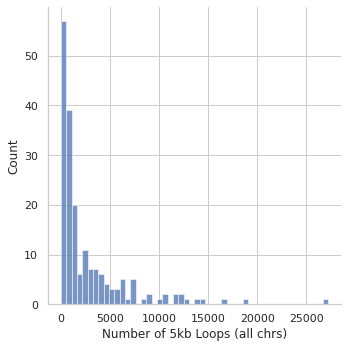

In [43]:
sns.displot(thres1_loop_df, bins=50, x="Number of 5kb Loops (all chrs)")
thres1_loop_df["Number of 5kb Loops (all chrs)"].describe()

count      190.00000
mean      4211.30000
std       4364.82147
min        120.00000
25%       1405.25000
50%       2577.50000
75%       5608.00000
max      32829.00000
Name: Number of 10kb Loops (all chrs), dtype: float64

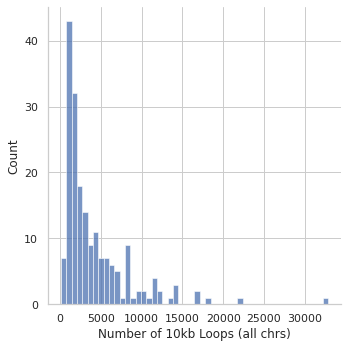

In [44]:
sns.displot(thres1_loop_df, bins=50, x="Number of 10kb Loops (all chrs)")
thres1_loop_df["Number of 10kb Loops (all chrs)"].describe()

count      190.000000
mean      4461.836842
std       2666.763292
min        253.000000
25%       2523.000000
50%       4116.500000
75%       5567.500000
max      20182.000000
Name: Number of 25kb Loops (all chrs), dtype: float64

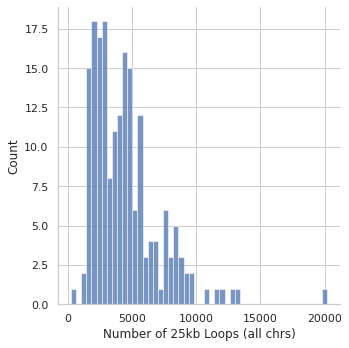

In [45]:
sns.displot(thres1_loop_df, bins=50, x="Number of 25kb Loops (all chrs)")
thres1_loop_df["Number of 25kb Loops (all chrs)"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (all chrs)'>

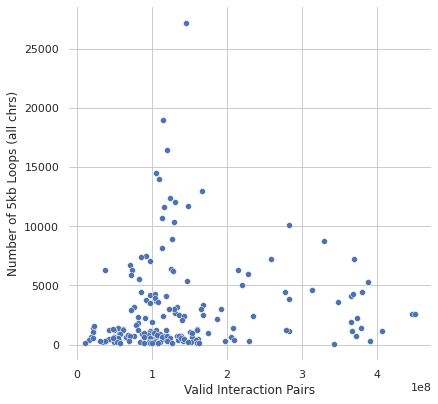

In [46]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (all chrs)'>

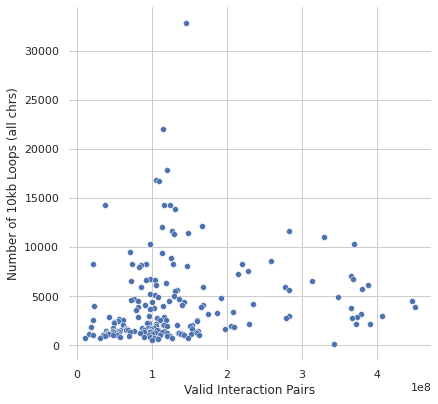

In [47]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (all chrs)'>

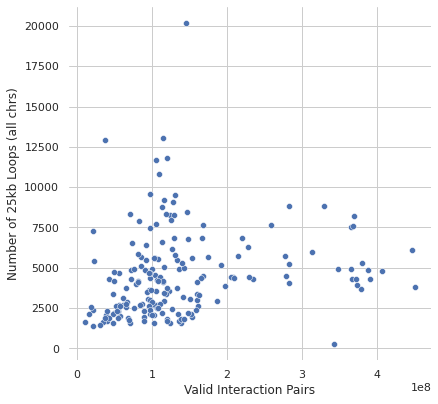

In [48]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

In [16]:
paths = glob.glob('results/loops/hiccups_vc/*.txt')

In [17]:
data = []
for path in paths:
    sample_data = []
    samples = []
    sample_name = path.split('/')[3].split('5000_')[0].split("_")[0]
    for path in paths:
        if sample_name in path:
            samples.append(path)
    normalization = path.split('/')[3].split('5000_')[0].split("_")[1]
    type_overlap = path.split('/')[3].split('5000_')[1].split('.')[0]
    
    sample_data.append(sample_name)
    
    with open(path) as f:
        lines = f.readlines()
        sample_data.append(len(lines))
    data.append(sample_data)
    
overlap_df = pd.DataFrame(data)  

In [20]:
cols = ["sample_name", "overlap_mode", "number_overlaps"]
overlap_df.columns = cols
overlap_df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,overlap_mode,number_overlaps
0,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,both,7378
1,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,either,10829
2,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,neither,532
3,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,both,5563
4,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,either,8245
5,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,neither,404
6,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,both,6466
7,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,neither,473
8,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,either,9649
9,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_vc,neither,380


<AxesSubplot:xlabel='sample_name', ylabel='number_overlaps'>

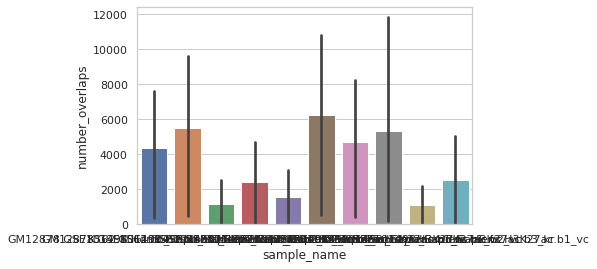

In [29]:
sns.barplot(data=overlap_df, x="sample_name", y = "number_overlaps")